<a href="https://colab.research.google.com/github/JaveyBae/ML4NLP1/blob/main/ex1_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4NLP1

## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is to get you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- NumPy: [Documentation](https://numpy.org/doc/)
- SHAP: [Documentation](https://shap.readthedocs.io/en/latest/index.html)

## Task Description

Follow the instructions in this notebook to:

1. Explore the data and create training/test splits for your experiments

2. Build a LogisticRegression classifier and design some relevant features to apply it to your data

3. Conduct hyperparameter tuning to find the optimal hyperparameters for your model

4. Explore your model's predictions and conduct an error analysis to see where the model fails

5. Conduct an interpretability analysis, investigating the model's most important features.

6. Conduct an ablation study using a subset of languages


Throughout the notebook, there are questions that you should address in your report. These are marked with 🗒❓.

☝ Note, these questions are intended to provide you with an opportunity to reflect on what it is that you are doing and the kind of challenges you might face along the way.




In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [ ]:
# Download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 92.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:01<00:00, 46.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 13.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 6.78MB/s]


In [ ]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [ ]:
# Get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)
print(len(labels))

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'


### 1.1 Exploring the training data

📝❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.

✍
1. There are some same words in some different languages.
2. There are 235 classes in train set with each class 500 samples, and there are 235 classes in test set with each class 500 samples. It is a balanced dataset.
3. The split is appropriate the distribution are balanced. The train and test contain the same set of labels.

Train distribution:
 label
est    500
swe    500
mai    500
oci    500
tha    500
      ... 
ell    500
lij    500
hau    500
mkd    500
ltz    500
Name: count, Length: 235, dtype: int64

Test distribution:
 label
mwl    500
nld    500
ava    500
tcy    500
bjn    500
      ... 
ton    500
nso    500
roh    500
udm    500
ckb    500
Name: count, Length: 235, dtype: int64

Train set: 235 classes, 117500 samples
Test set:  235 classes, 117500 samples


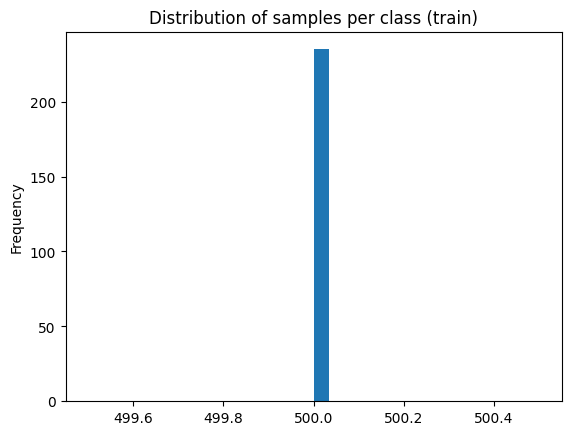

Train and test have the same labels.


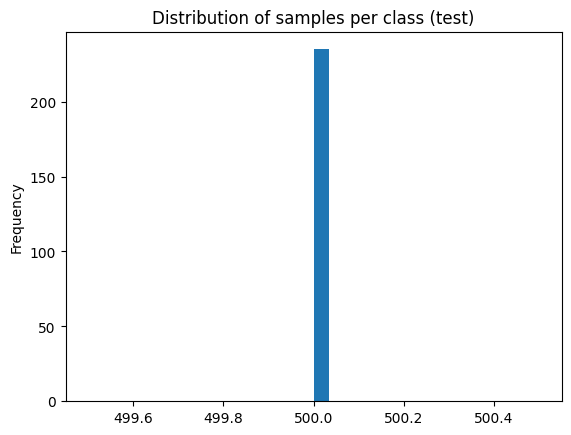

In [ ]:
# Count per label in train and test
print("Train distribution:\n", train_df["label"].value_counts())
print("\nTest distribution:\n", test_df["label"].value_counts())

print(f"\nTrain set: {train_df['label'].nunique()} classes, {len(train_df)} samples")
print(f"Test set:  {test_df['label'].nunique()} classes, {len(test_df)} samples")

# Visulization
import matplotlib.pyplot as plt
plt.show()
train_df["label"].value_counts().plot(
    kind="hist", bins=30, title="Distribution of samples per class (train)"
)
plt.show()
test_df["label"].value_counts().plot(
    kind="hist", bins=30, title="Distribution of samples per class (test)"
)

# Check if train and test contain the same set of labels
if set(train_df['label'].unique()) == set(test_df['label'].unique()):
    print("Train and test have the same labels.")
else:
    print("Label mismatch between train and test.")


### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [ ]:
# TODO: Create your train/test subsets of languages
selected_labels = ['eng', 'deu', 'nld', 'dan', 'swe', 'nob', 'jpn','est', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam']
print(f'The subset includes {len(set(selected_labels))} languages.')
train_df = train_df[train_df['label'].isin(selected_labels)]
test_df = test_df[test_df['label'].isin(selected_labels)]

X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

# Check the subset
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

The subset includes 20 languages.
label
est    500
swe    500
mai    500
oci    500
tha    500
orm    500
lim    500
guj    500
pnb    500
zea    500
krc    500
hat    500
pcd    500
tam    500
nld    500
jpn    500
dan    500
nob    500
eng    500
deu    500
Name: count, dtype: int64
label
nld    500
hat    500
jpn    500
pnb    500
orm    500
nob    500
eng    500
guj    500
lim    500
krc    500
zea    500
oci    500
mai    500
tam    500
pcd    500
swe    500
dan    500
deu    500
est    500
tha    500
Name: count, dtype: int64


In [ ]:
# TODO: With the following code, we wanted to ENCODE the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y_train)
y_train, y_test = label_encoder.transform(y_train), label_encoder.transform(y_test)
print(label_encoder.classes_)
print(y_train)
print(y_test)

['dan' 'deu' 'eng' 'est' 'guj' 'hat' 'jpn' 'krc' 'lim' 'mai' 'nld' 'nob'
 'oci' 'orm' 'pcd' 'pnb' 'swe' 'tam' 'tha' 'zea']
[ 3 16  9 ... 12  8  0]
[10  5  6 ...  4  0 15]


### 2.1 Build a LogisticRegression classifier

To start with, we're going to build a very simple LogisticRegression classifier.
Use a `Pipeline` to chain togther a `CountVectorizer` and a `LogisticRegression` estimator. Then perform a 5-fold cross validation and report the scores of this model as a baseline.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# TODO: Define a very basic pipeline using a CountVectorizer and a LogisticRegression classifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('logi', LogisticRegression())
])


In [ ]:
# TODO: Run a cross validation to estimate the model's expected performance
text_clf.fit(X_train, y_train)
scores = cross_val_score(text_clf, X_train, y_train, scoring='accuracy', cv=10)
scores

array([0.957, 0.955, 0.961, 0.963, 0.96 , 0.941, 0.957, 0.958, 0.956,
       0.946])


### 2.2 Feature Engineering

So far, we've only considered the basic `CountVectorizer` at the word level to encode our input texts for our model.

Your task is to apply some text preprocessing and engineer some more informative features.

To do this, think about what other features might be relevant for determining the language of an input text.

Define a custom set of feature extractors and implement the necessary preprocessing steps to extract these features from strings.

Then initialise a processing pipeline that converts your input data into features that the model can take as input.

☝ Note, this step can be as involved as your heart desires, there is only one minimal requirement: you must use something more than the base `CountVectorizer`. We recommend that you take a look at the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) and [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#transformermixin) classes from `sk-learn`, as these can be helpful for defining custom transformers.


In [ ]:
# TODO: Data cleaning/Feature engineering steps
import re
import numpy as np
from scipy.sparse import csr_matrix

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

class Feature_Extractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rows = []
        for text in X:
            rows.append([
                self.avg_word_length(text),
                self.special_char_count(text),
                self.capital_ratio(text)
            ])
        return np.asarray(rows, dtype=float)

# Feature 1: Average words length
    def avg_word_length(self, text):
        words = text.split()
        return np.mean([len(w) for w in words]) if words else 0.0

# Feature 2: Special Characters Count
    def special_char_count(self, text):
        return len(re.findall(r'[^\w\s]', text))

# Feature 3: Ratio of capitals
    def capital_ratio(self, text):
        t = text or ""
        total = len(t)
        return (sum(1 for c in t if c.isupper()) / total) if total else 0.0

class DenseToSparse(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X): return csr_matrix(X)

numeric_branch = Pipeline([
    ('custom', Feature_Extractor()),
    ('scale', StandardScaler(with_mean=True, with_std=True)),
    ('to_sparse', DenseToSparse()),
])


text_branch = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(2,4), max_features=5000)),
    ('tfidf', TfidfTransformer()),
])

pipe = Pipeline([
    ('features', FeatureUnion([
        ('num', numeric_branch),
        ('txt', text_branch),
    ])),
    ('lr', LogisticRegression(max_iter=300))
])

---

### 3.1 Grid Search

Use sklearn's GridSearchCV and experiment with the following hyperparameters:
1. Penalty (Regularization)
2. Solver
3. Experiment with parameters of the Vectorizer (optional, but highly advised)

☝ Note, don't overdo it at the beginning, since runtime might go up fast!

Make sure you read through the [docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to get an understanding of what these parameters do.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'features__txt__vect__ngram_range': [(3,3), (2,4)],
        'lr__solver': ['liblinear'],
        'lr__penalty': ['l2'],
        'lr__C': [0.5, 1.0],
    },
]

gs_pipe = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
gs_pipe.fit(X_train, y_train)

print(gs_pipe.best_params_)
print(gs_pipe.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'features__txt__vect__ngram_range': (3, 3), 'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
0.9714


In [ ]:
gs_pipe

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('num',
                                                                        Pipeline(steps=[('custom',
                                                                                         Feature_Extractor()),
                                                                                        ('scale',
                                                                                         StandardScaler()),
                                                                                        ('to_sparse',
                                                                                         DenseToSparse())])),
                                                                       ('txt',
                                                                        Pipeline(steps=[('vect',
                                                                                         CountVectorizer(analyzer='char',
                                                                                                         max_features=5000,
                                                                                                         ngram_range=(2,
                                                                                                                      4))),
                                                                                        ('tfidf',
                                                                                         TfidfTransformer())]))])),
                                       ('lr',
                                        LogisticRegression(max_iter=300))]),
             n_jobs=-1,
             param_grid=[{'features__txt__vect__ngram_range': [(3, 3), (2, 4)],
                          'lr__C': [0.5, 1.0], 'lr__penalty': ['l2'],
                          'lr__solver': ['liblinear']}],
             verbose=1)

### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.

📝❓ What is the advantage of grid search cross-validation?


In [ ]:
# TODO: Select the best model based on the GridSearch results
best_model = gs_pipe.best_estimator_

lr_df = pd.DataFrame.from_dict(gs_pipe.cv_results_)
lr_df.sort_values(by=["rank_test_score"], inplace=True)
lr_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_features__txt__vect__ngram_range,param_lr__C,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,15.128752,0.238240,1.316717,0.352204,"(3, 3)",1.0,l2,liblinear,"{'features__txt__vect__ngram_range': (3, 3), '...",0.9700,0.9695,0.9735,0.9710,0.9730,0.9714,0.001594,1
3,36.200311,1.412573,2.615013,0.810174,"(2, 4)",1.0,l2,liblinear,"{'features__txt__vect__ngram_range': (2, 4), '...",0.9680,0.9690,0.9695,0.9705,0.9715,0.9697,0.001208,2
0,15.424673,0.820574,2.034452,1.375973,"(3, 3)",0.5,l2,liblinear,"{'features__txt__vect__ngram_range': (3, 3), '...",0.9640,0.9680,0.9695,0.9675,0.9700,0.9678,0.002112,3
2,33.559713,3.052230,3.192188,0.632824,"(2, 4)",0.5,l2,liblinear,"{'features__txt__vect__ngram_range': (2, 4), '...",0.9655,0.9650,0.9670,0.9680,0.9685,0.9668,0.001364,4


## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?


In [ ]:
# TODO: Evaluate the model by inspecting the predictions on the heldout test set

y_pred = best_model.predict(X_test)

# Evaluate on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'Precision Score: {precision_score(y_test, y_pred, average="macro"):.3f}')
print(f'Recall Score: {recall_score(y_test, y_pred, average="macro"):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro"):.3f}')

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.975
Precision Score: 0.976
Recall Score: 0.974
F1 Score: 0.975


---

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.

📝❓ Where does your model do well and where does it fail?

📝❓ What are some possible reasons for why it fails in these cases?


Classification Report:

              precision    recall  f1-score   support

         dan      0.984     0.956     0.970       500
         deu      0.963     0.978     0.970       500
         eng      0.820     0.978     0.892       500
         est      0.990     0.968     0.979       500
         guj      1.000     0.964     0.982       500
         hat      1.000     0.988     0.994       500
         jpn      0.996     0.970     0.983       500
         krc      0.992     0.994     0.993       500
         lim      0.992     0.986     0.989       500
         mai      0.998     0.976     0.987       500
         nld      0.967     0.990     0.978       500
         nob      0.978     0.974     0.976       500
         oci      0.959     0.972     0.965       500
         orm      0.998     0.970     0.984       500
         pcd      0.893     0.898     0.895       500
         pnb      1.000     0.998     0.999       500
         swe      1.000     0.998     0.999       500
  

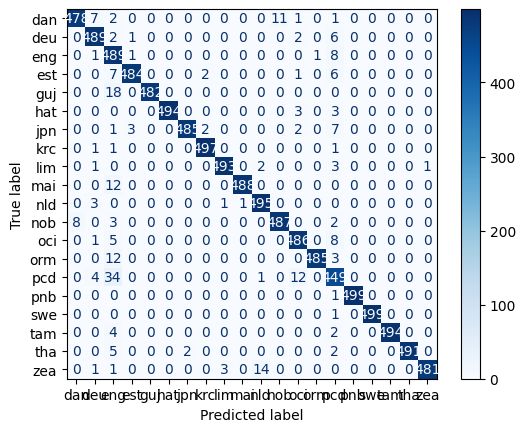

In [ ]:
# TODO: Inspect the model's predcitions on the different classes

# Classification Report (per class metrics)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, digits=3))

# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)

# or for more visual rep, plot it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap = 'Blues')

---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.



In [ ]:
# To use shap, we first need to install it into the current environment
!pip install --upgrade shap

import shap

In [ ]:
pipe = best_model
print(pipe)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('custom',
                                                                  Feature_Extractor()),
                                                                 ('scale',
                                                                  StandardScaler()),
                                                                 ('to_sparse',
                                                                  DenseToSparse())])),
                                                ('txt',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer(analyzer='char',
                                                                                  max_features=5000,
                                                                                  ngram_range=(

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Shape of SHAP values: (1000, 5003, 20)


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


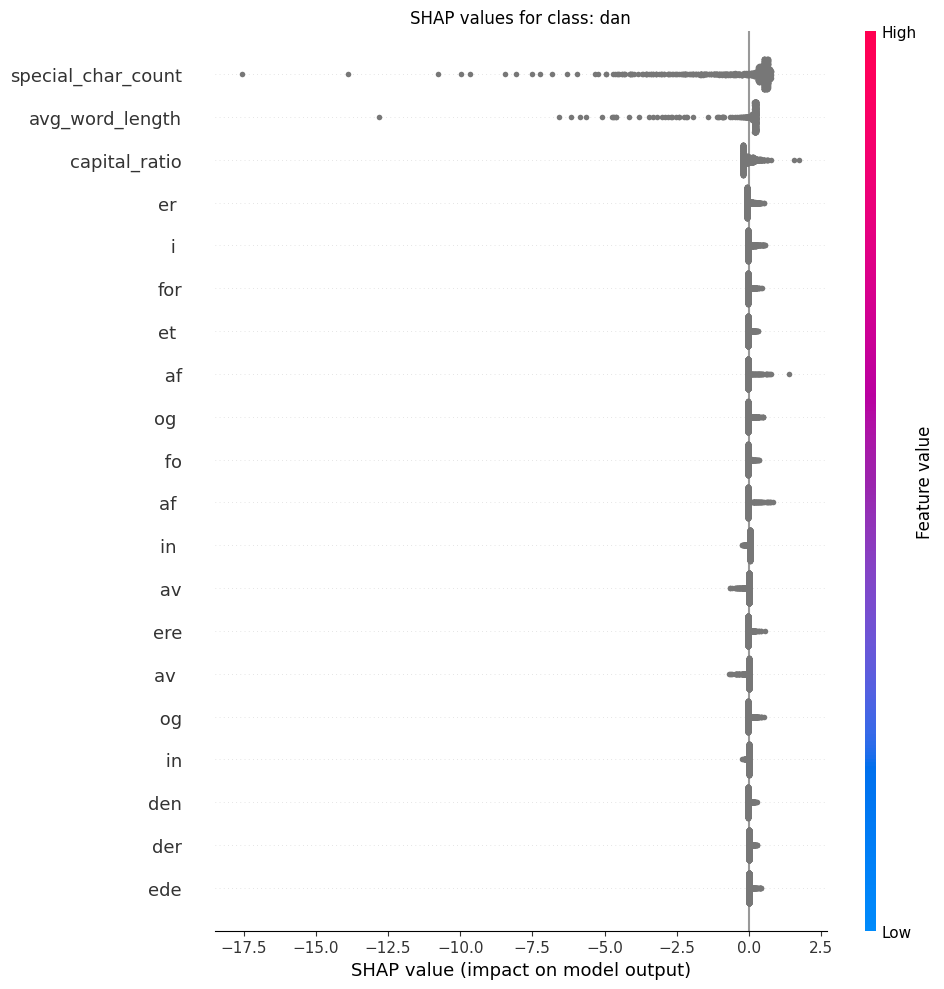

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


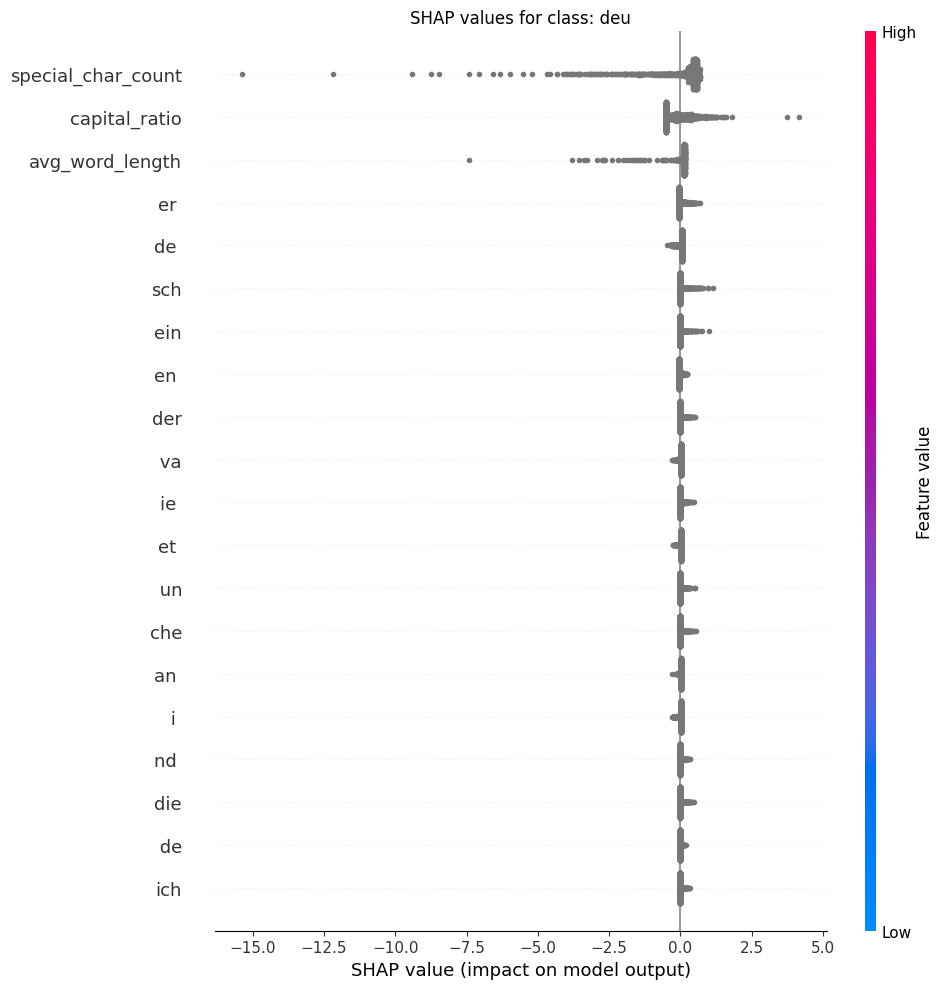

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


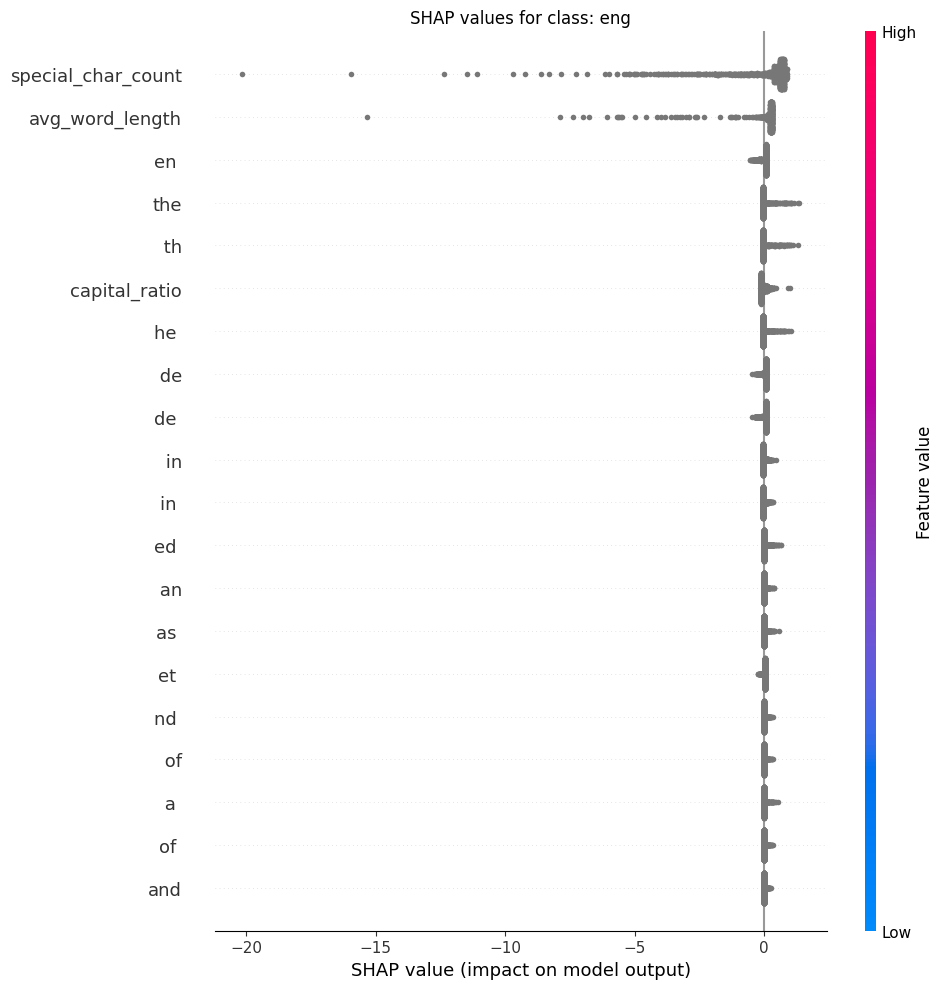

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


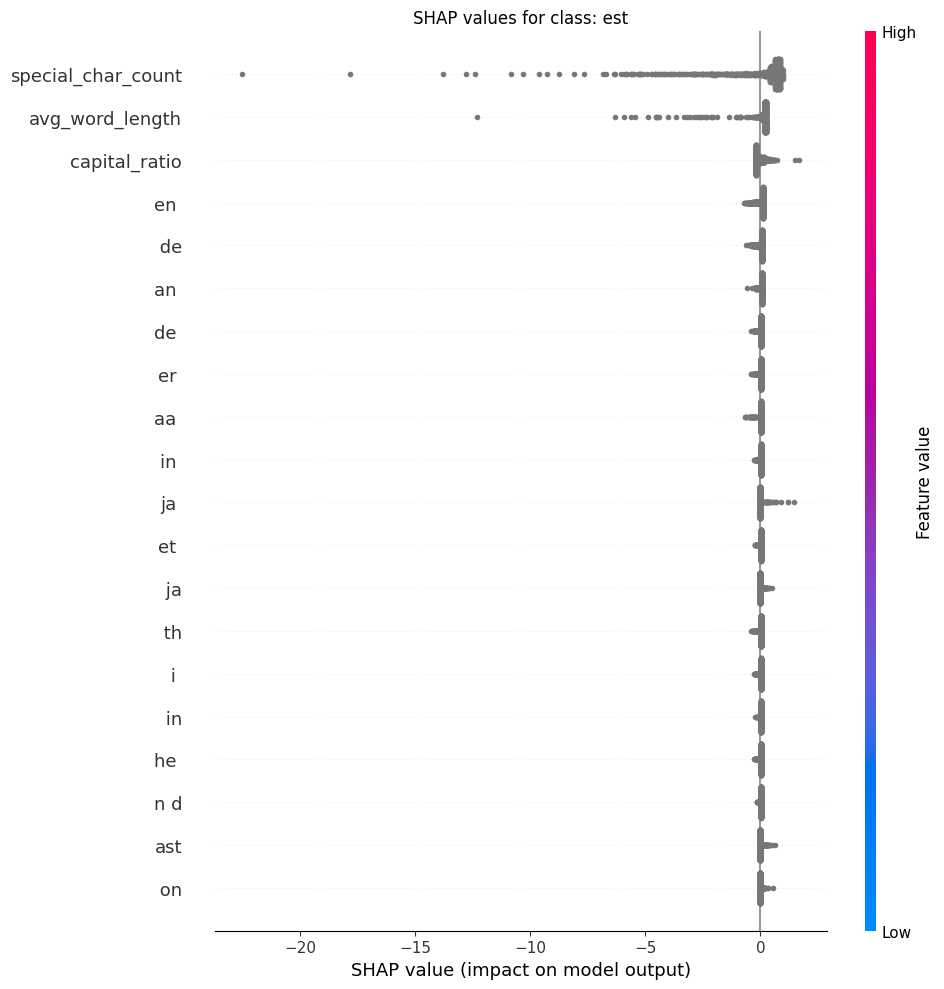

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 2728 (\N{GUJARATI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Matplotlib currently does no

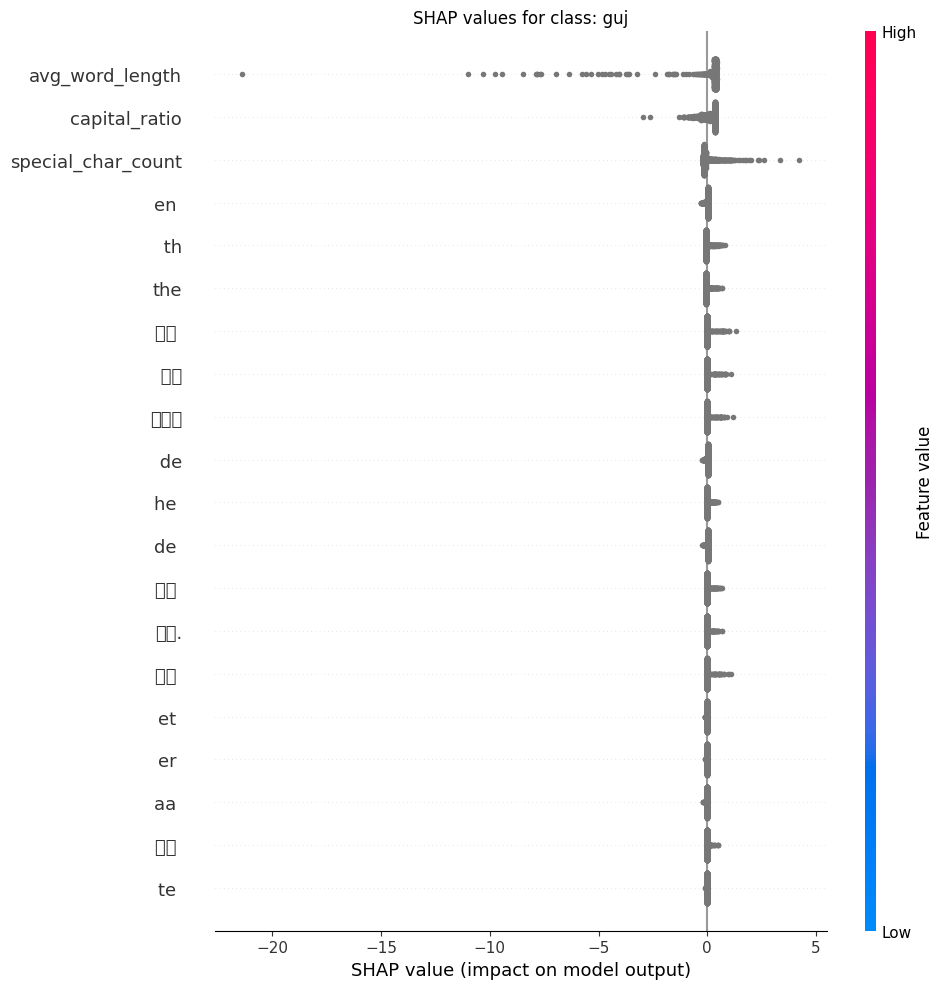

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


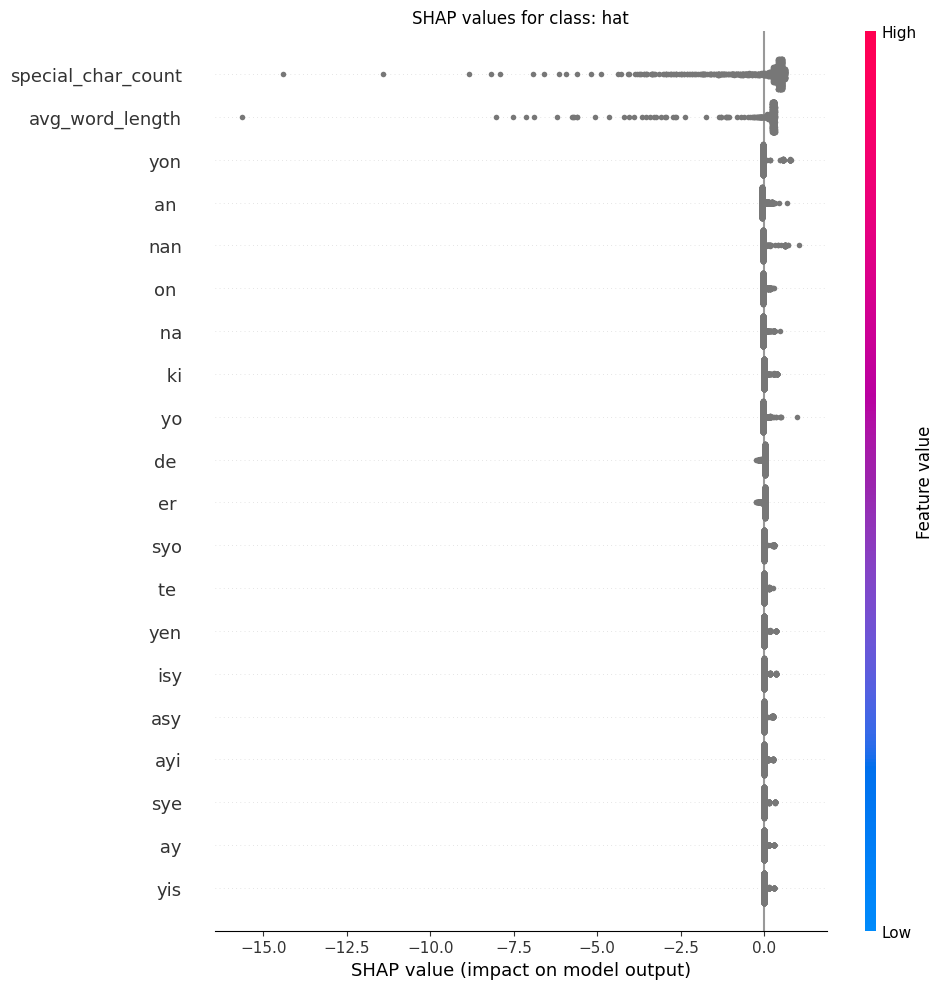

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 12427 (\N{HIRAGANA LET

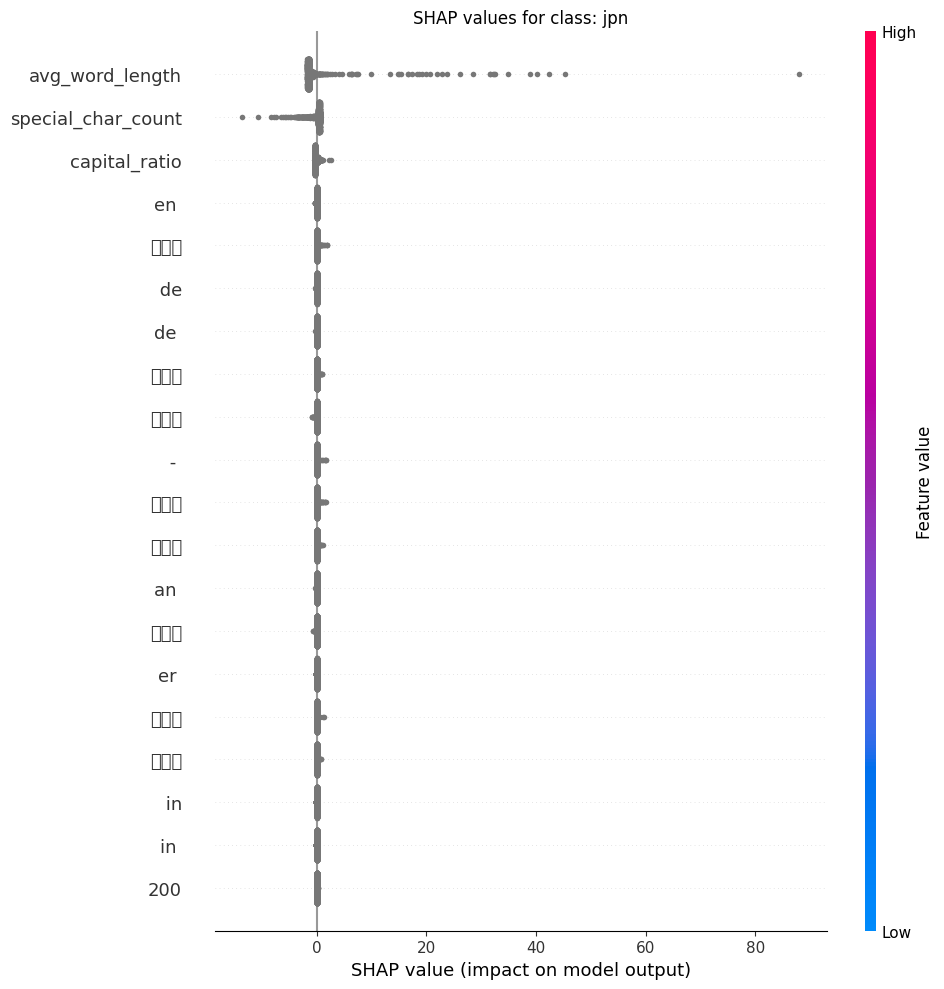

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


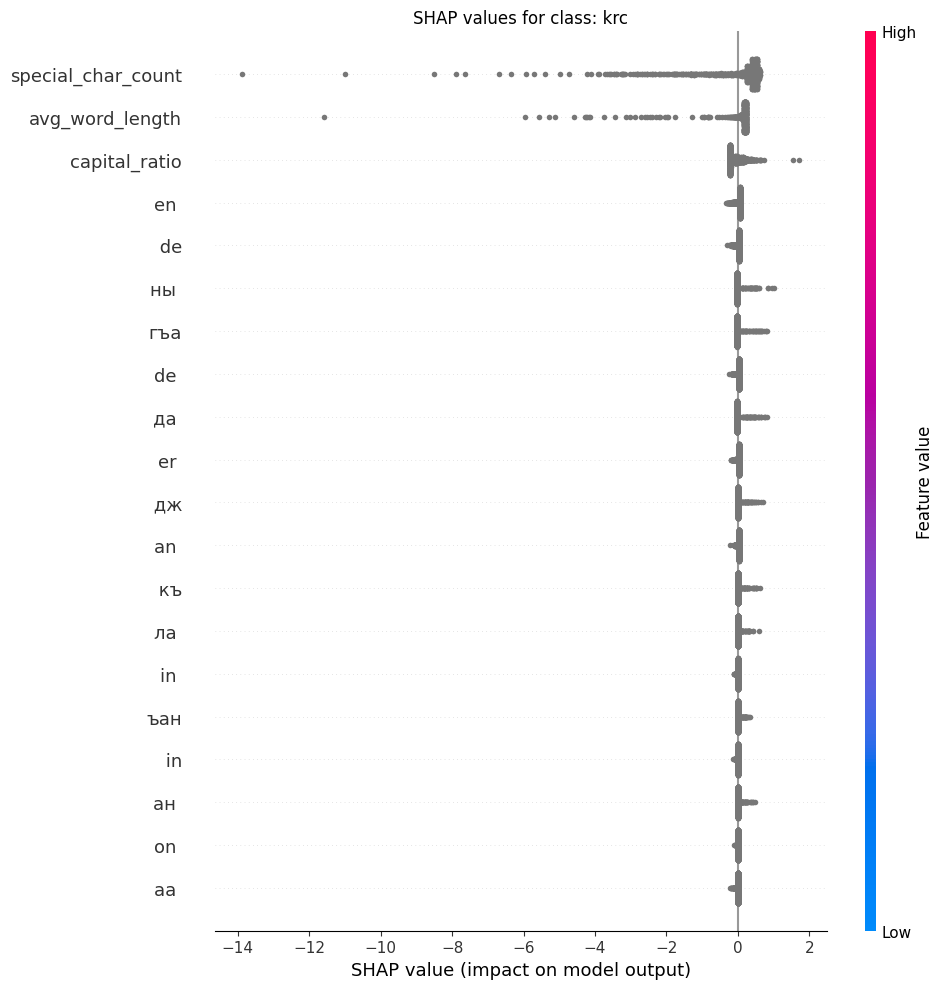

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


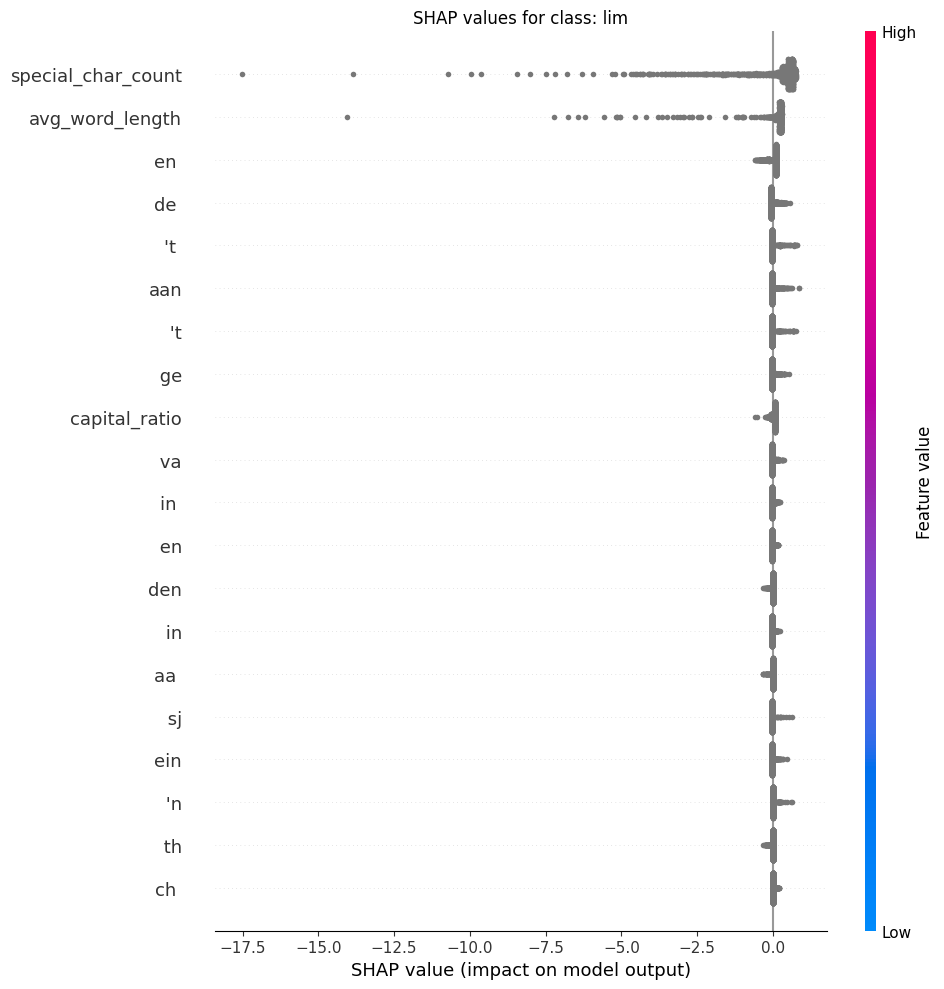

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 2715 (\N{GUJARATI LETTER CHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Matplotlib currently does n

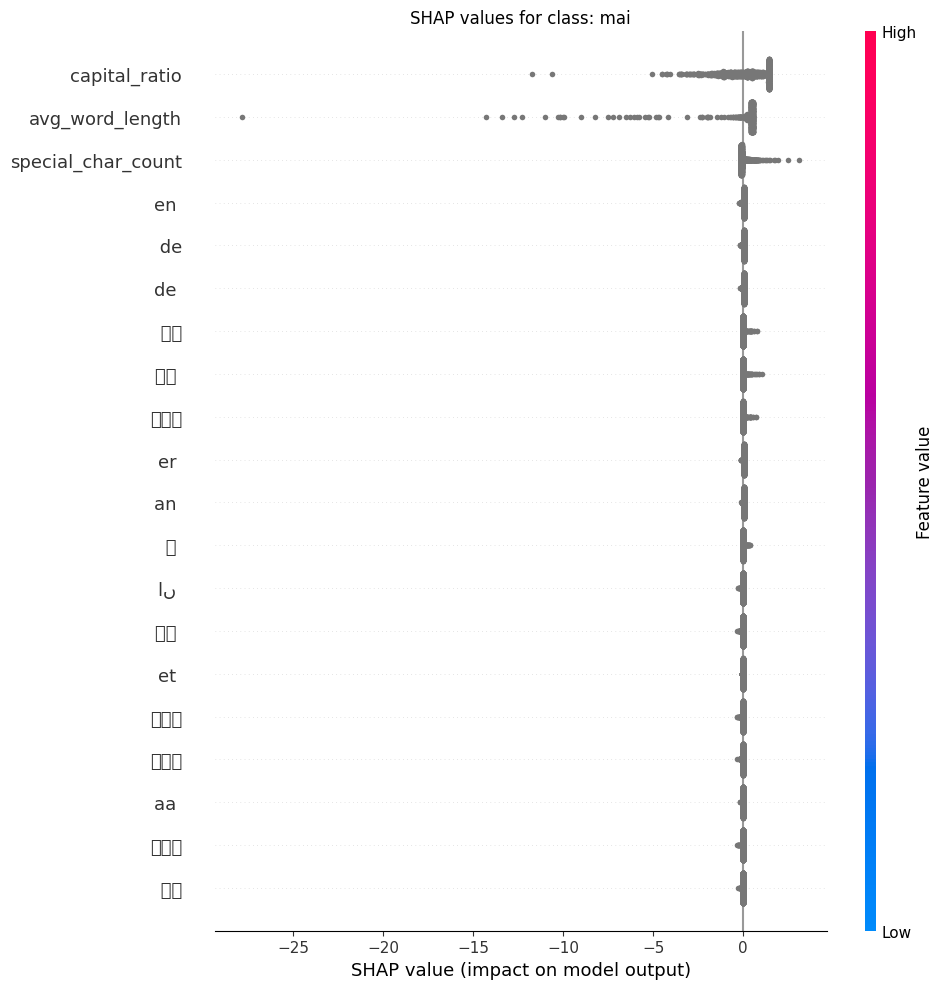

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


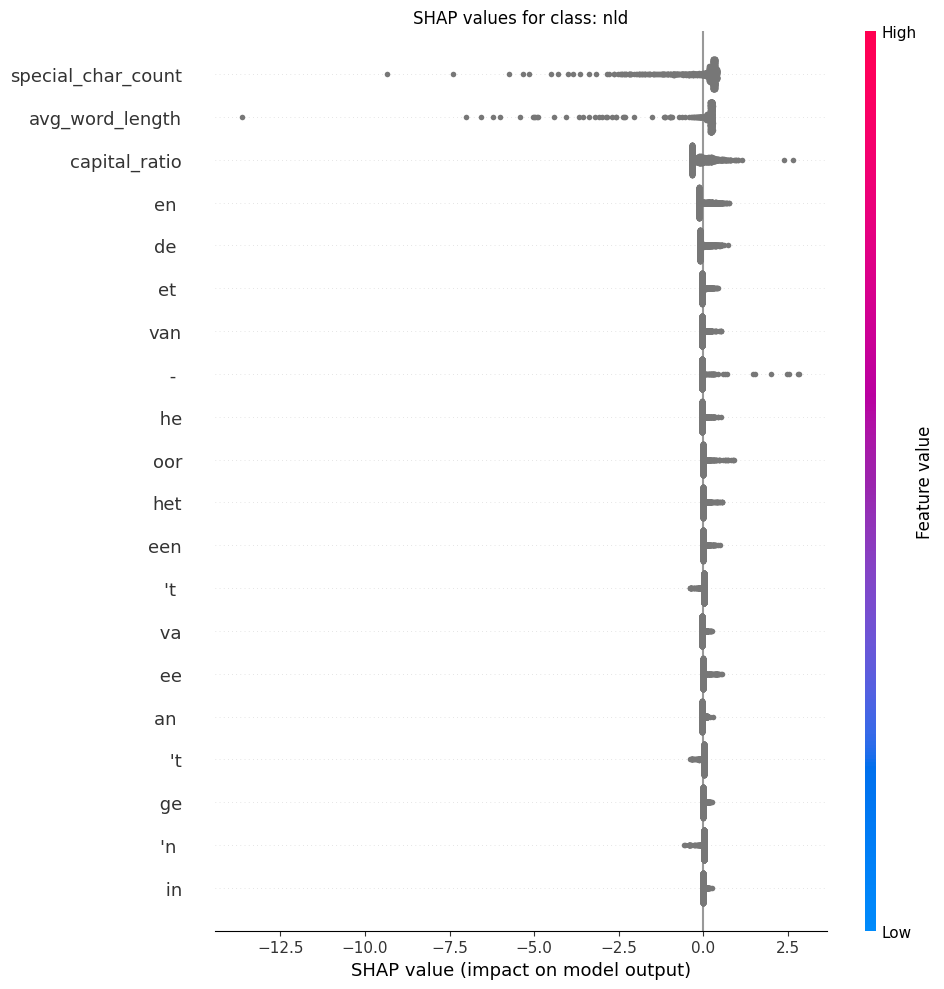

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


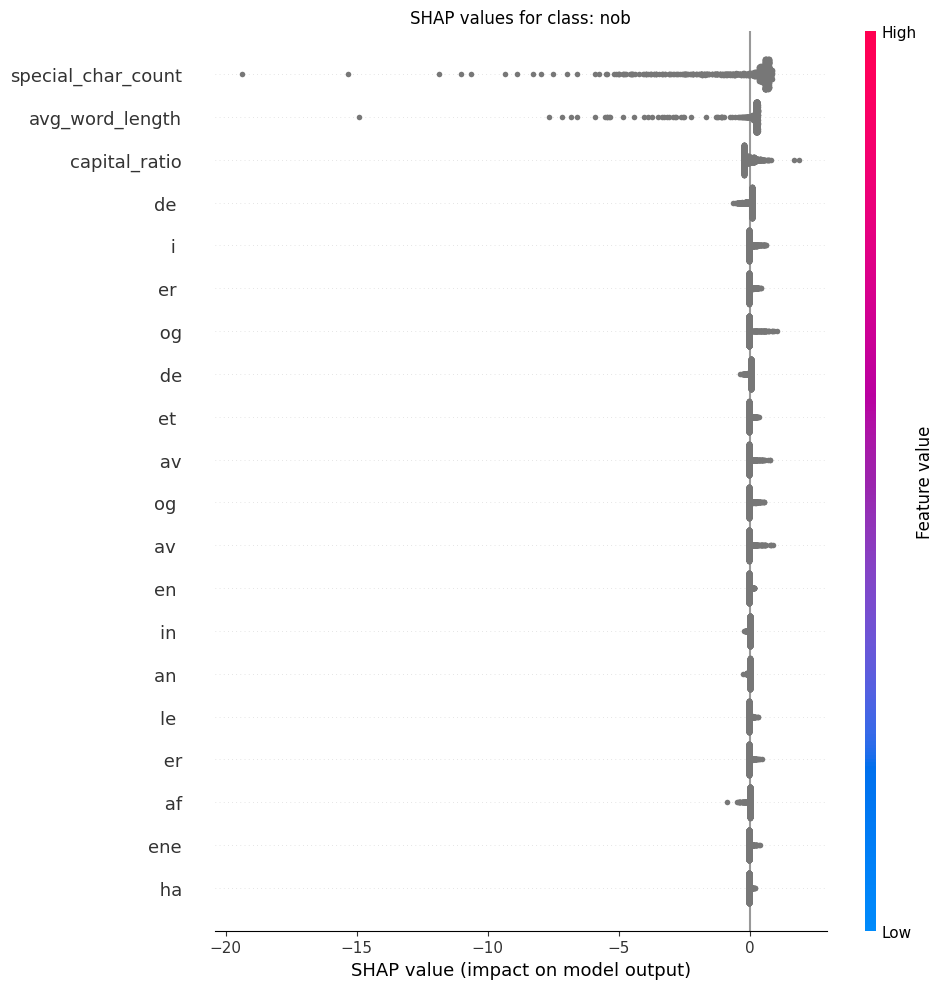

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


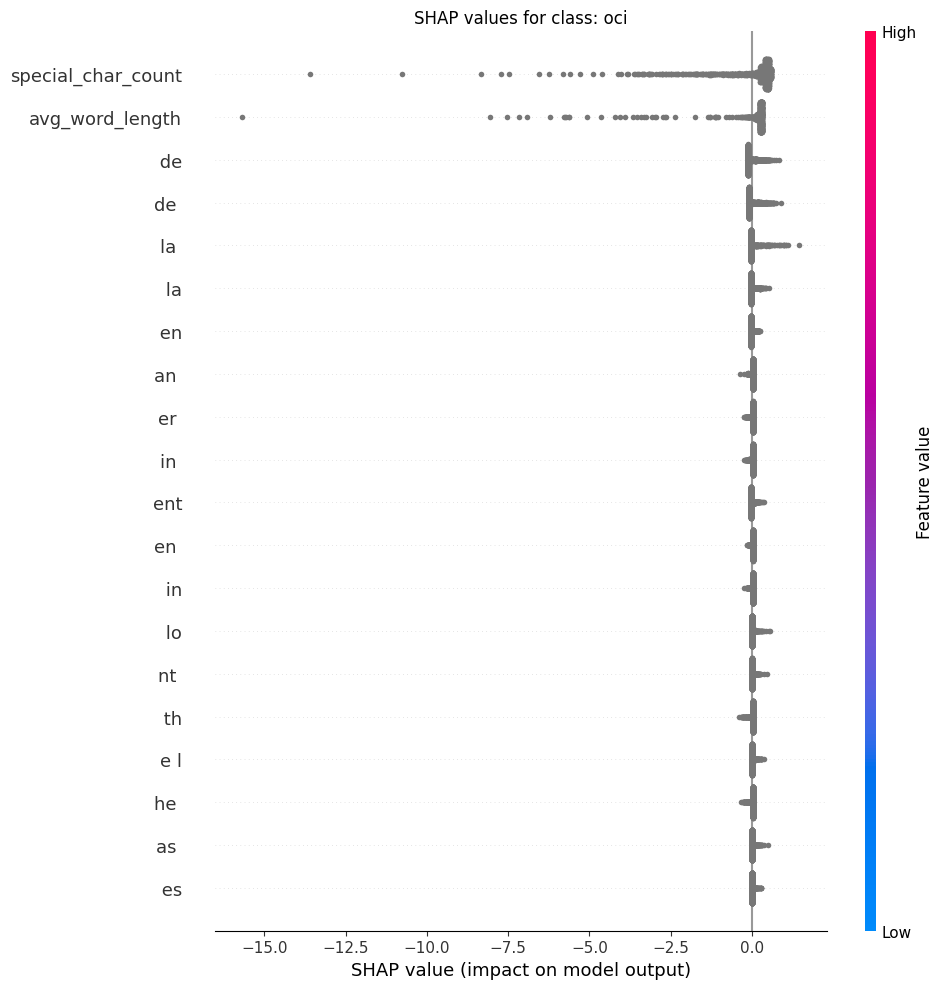

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


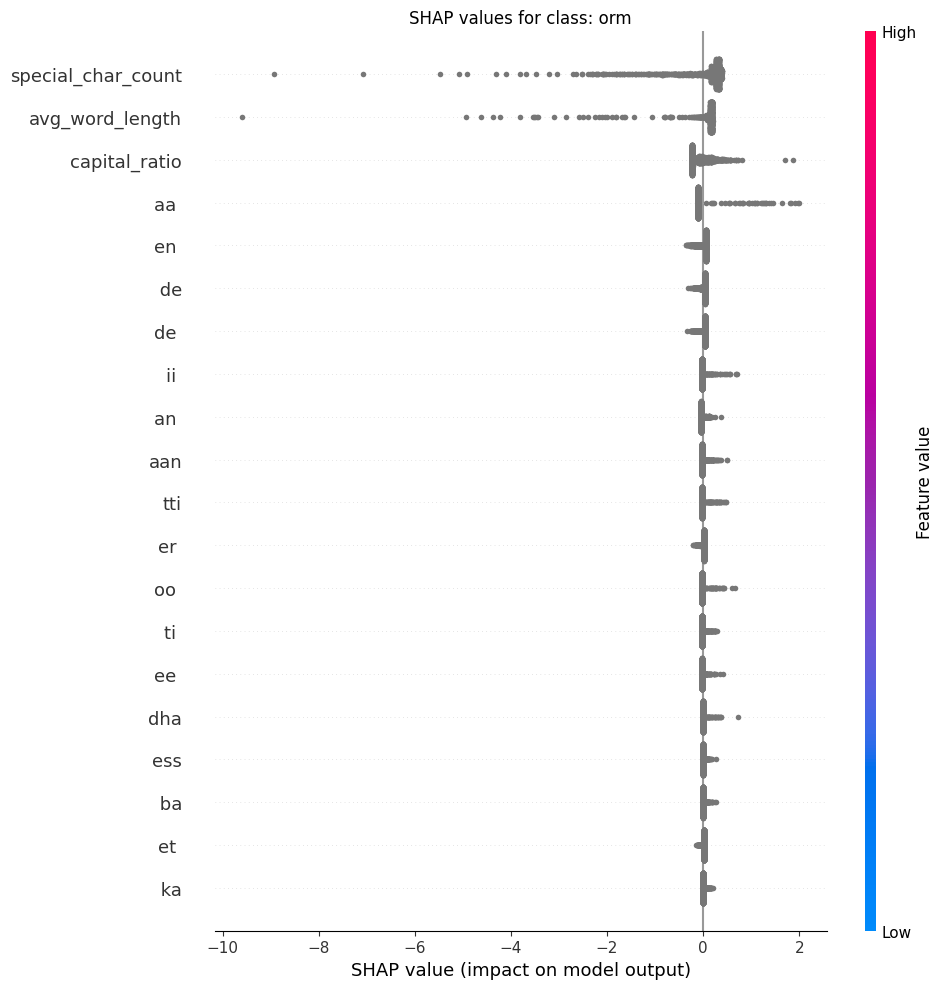

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


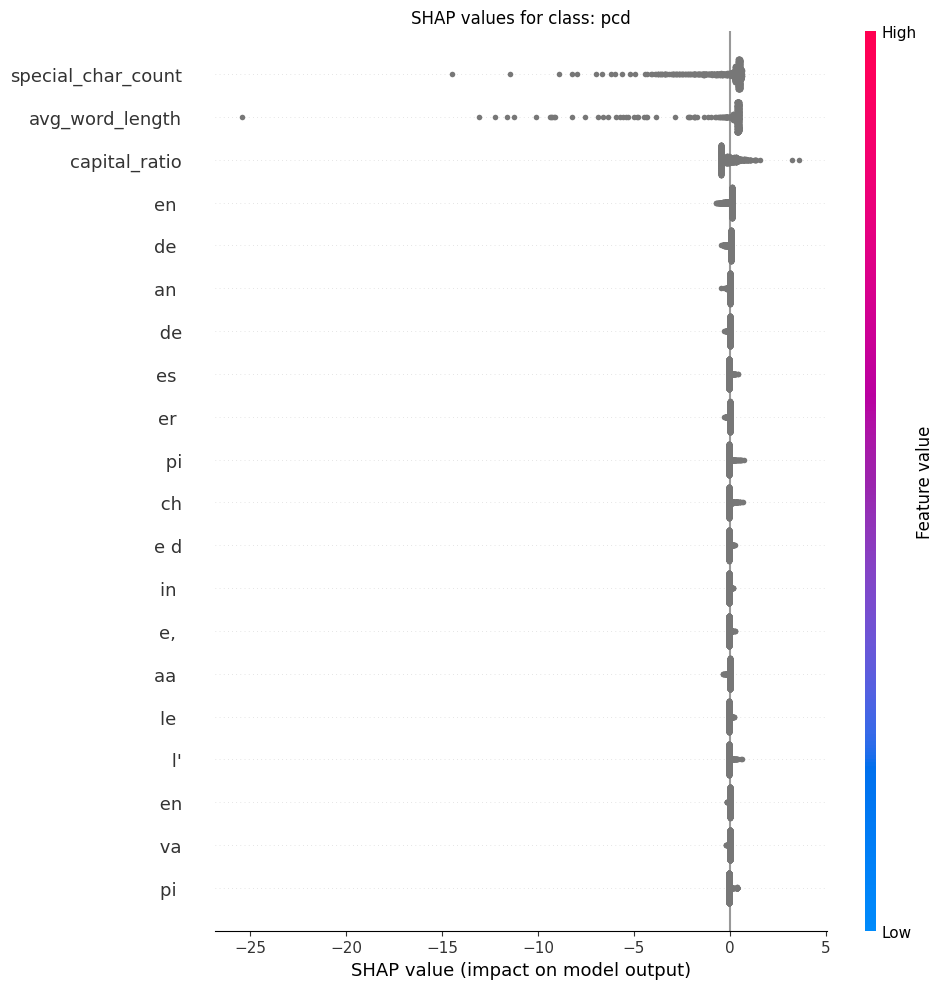

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Matplotlib currently d

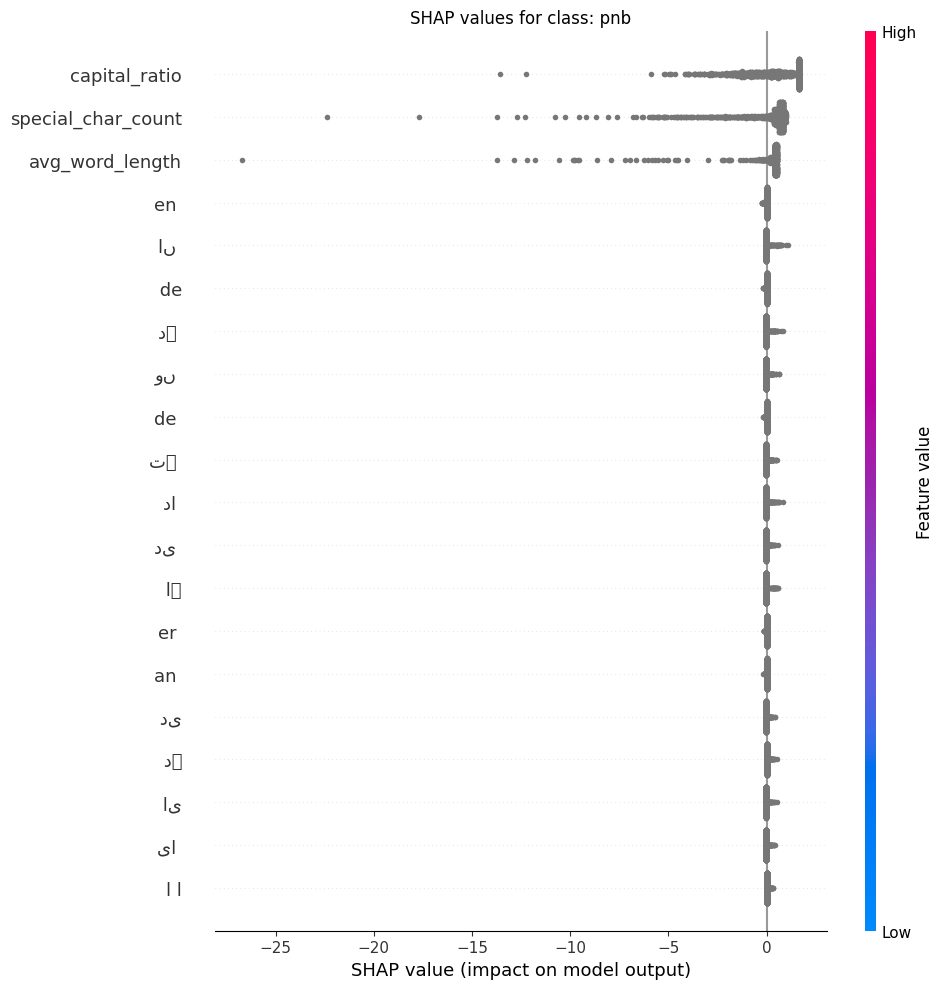

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


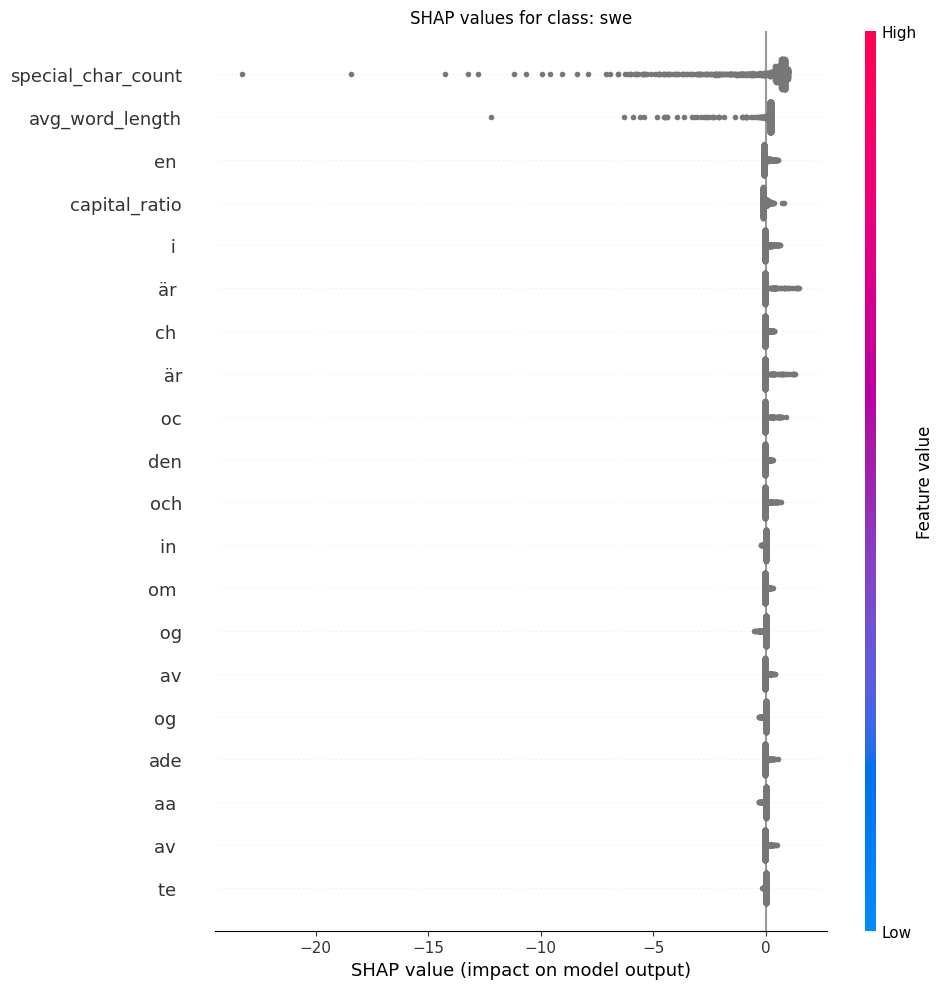

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Matplotlib currently does no

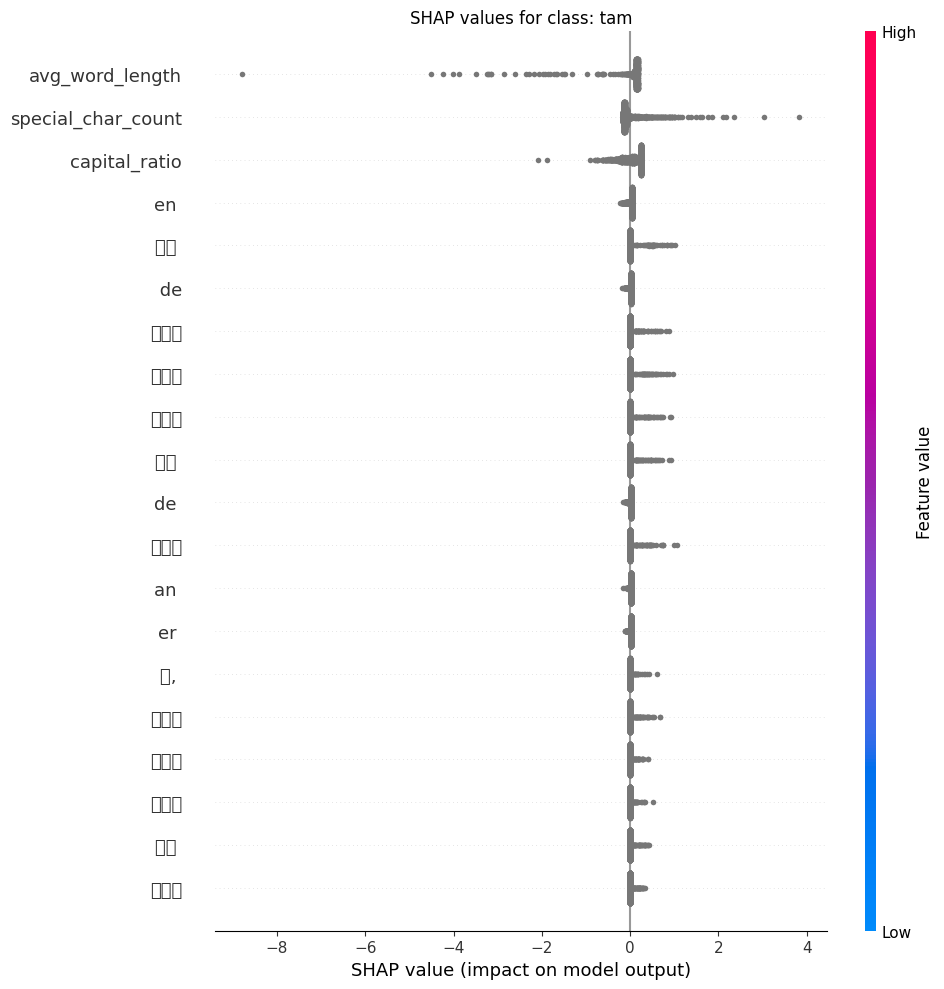

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 3656 (\N{THAI CHA

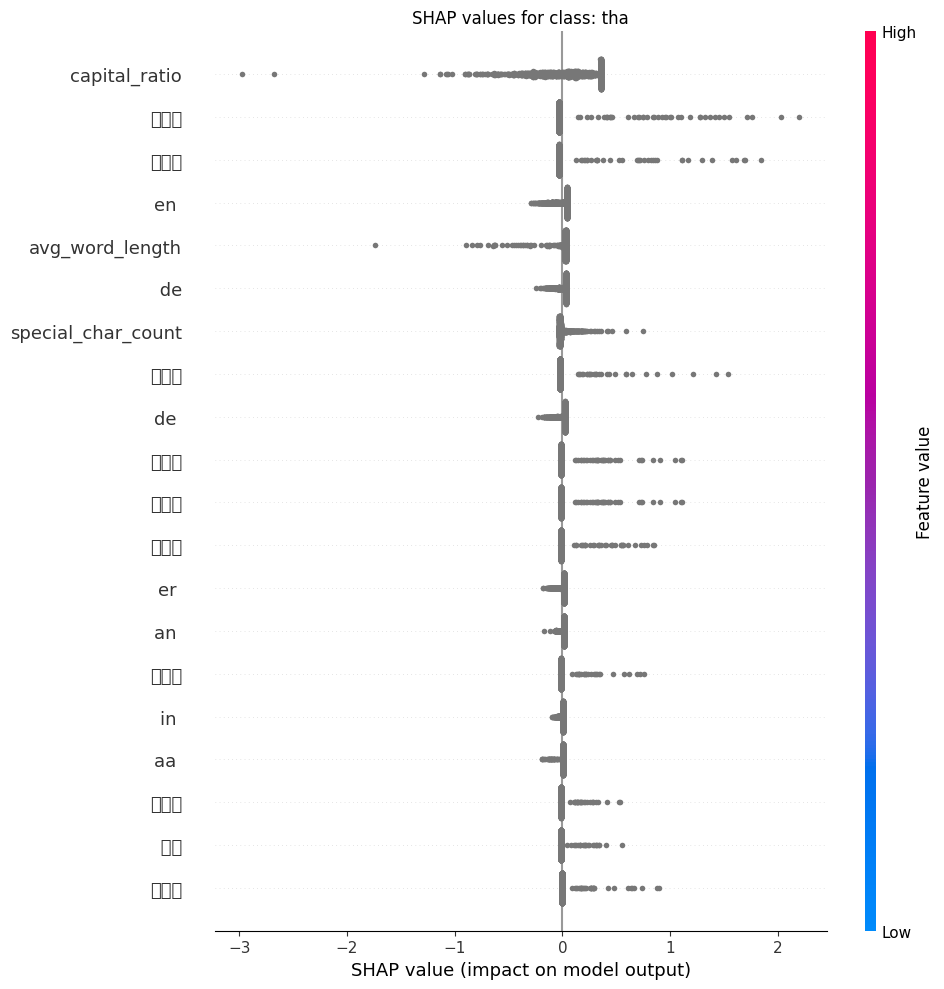

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/tmp/ipython-input-3586990965.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)


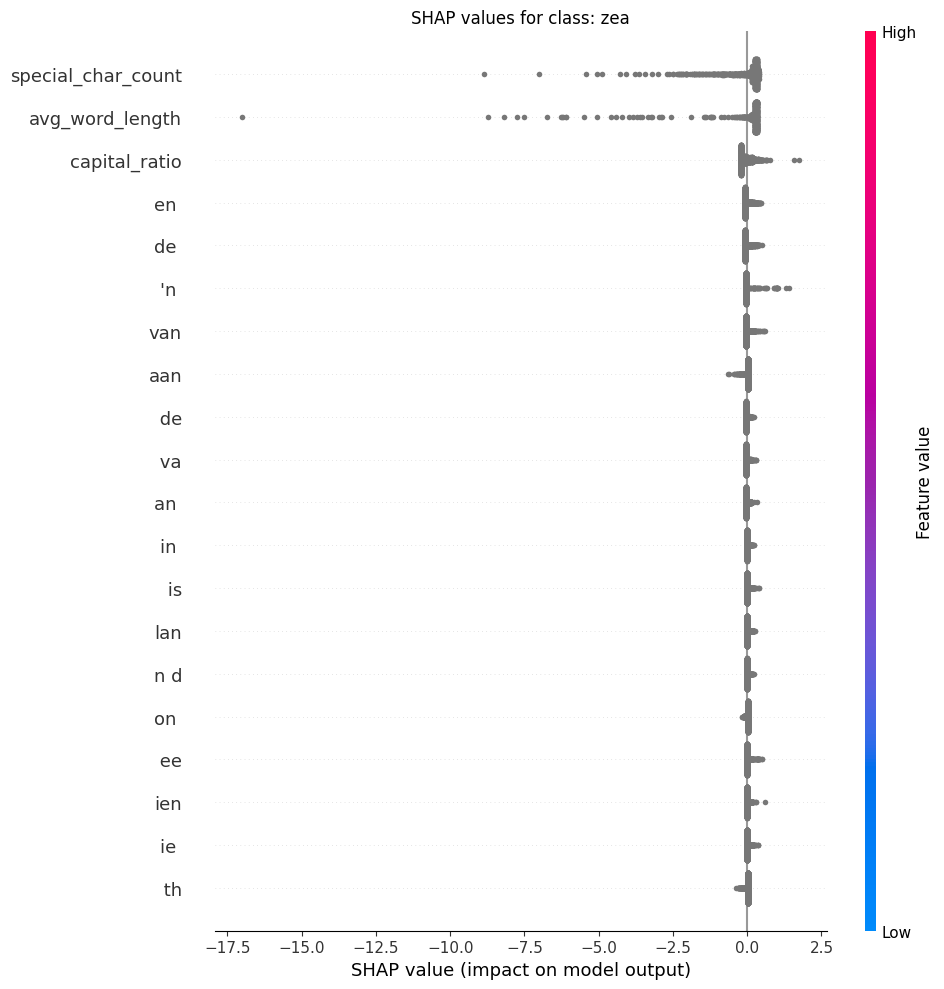

In [ ]:
# TODO: Inspect most important features according to the model using SHAP

import gc
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import hstack

pipe = best_model

# Extract feature names from CountVectorizer if using in the pipeline
# Correctly access the CountVectorizer within the FeatureUnion
text_feature_names = pipe.named_steps['features'].transformer_list[1][1].named_steps['vect'].get_feature_names_out()
# Manually create names for numeric features
numeric_feature_names = ['avg_word_length', 'special_char_count', 'capital_ratio']
feature_names = numeric_feature_names + list(text_feature_names)


# Create a function that applies the pipeline transformations (excluding the final model)
def pipeline_transform(X):
    # Apply the numeric branch transformation
    X_numeric = pipe.named_steps['features'].transformer_list[0][1].transform(X)
    # Apply the text branch transformation
    X_text = pipe.named_steps['features'].transformer_list[1][1].transform(X)
    # Horizontally stack the results
    transformed_X = hstack([X_numeric, X_text])
    return transformed_X


# Initialize SHAP explainer using the fitted logistic regression model and transformed training data
explainer = shap.LinearExplainer(pipe.named_steps['lr'], pipeline_transform(X_train))

# Calculate SHAP values for a subset of the test set to reduce memory usage
# Using the first 1000 samples as an example
X_test_subset = X_test[:1000]
shap_values = explainer(pipeline_transform(X_test_subset))

# Print the shape of the SHAP values for debugging
print("Shape of SHAP values:", shap_values.shape)

# Loop through each class and plot the SHAP values
for i, category in enumerate(label_encoder.classes_): # Use label_encoder.classes_ to get the correct class names
    try:
        figsize = (10, 10)
        plt.figure(figsize=figsize)

        # Extract SHAP values for the current class (ensure the index is valid)
        # Correctly index the 3D SHAP values array: (samples, features, classes)
        if i < shap_values.shape[2]:  # Ensure class index is within bounds
             # Extract SHAP values for all samples and features for the current class
            shap_values_for_class = shap_values[:, :, i]

            # Summary plot
            shap.summary_plot(shap_values_for_class, pipeline_transform(X_test_subset), feature_names=feature_names, max_display=20, show=False, plot_size=figsize)
            plt.title(f"SHAP values for class: {category}")
            plt.tight_layout()
            plt.show()
        else:
            print(f"Warning: Class index {i} out of range for SHAP values.")

        # Explicitly call garbage collection to free memory
        gc.collect()

    except Exception as e:
        print(f"An error occurred while plotting SHAP values for class '{category}': {e}")
        gc.collect()

---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [ ]:
# TODO: Ablation study

import warnings
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # Import necessary modules

# Filter out convergence warnings from Logistic Regression
warnings.filterwarnings("ignore", message="The max_iter was reached which means the coef_ did not converge")


# Create a DataFrame to hold languages and their correct prediction counts
correct_predictions = np.diag(cm)

correct_prediction_df = pd.DataFrame({
    'Language': label_encoder.classes_,
    'Correct Predictions': correct_predictions
})
# Sort by correct predictions and get the top 2 well-performing languages
top_2_languages = correct_prediction_df.sort_values(by='Correct Predictions', ascending=False).head(2)


# Take the top 2 languages, filter the dataset accordingly
labels = top_2_languages['Language'].tolist()
# Reload the original dataframes before filtering to ensure we start with the full dataset
# This is important because the previous filtering in cell SghPjc0V9ECd is persistent
with open(f'x_train.txt') as f:
    x_train_full = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train_full = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test_full = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test_full = f.read().splitlines()

train_df_full = pd.DataFrame({'text': x_train_full, 'label': y_train_full})
test_df_full = pd.DataFrame({'text': x_test_full, 'label': y_test_full})


train_df = train_df_full[train_df_full['label'].isin(labels)].copy()
test_df = test_df_full[test_df_full['label'].isin(labels)].copy()

X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

# Re-encode the labels for the subset
label_encoder_subset = LabelEncoder().fit(y_train)
y_train_encoded = label_encoder_subset.transform(y_train)
y_test_encoded = label_encoder_subset.transform(y_test)


from sklearn.base import BaseEstimator, TransformerMixin

class TextReducer(BaseEstimator, TransformerMixin):
    def __init__(self, max_len=None):
        self.max_len = max_len

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.max_len is not None:
            X_truncated = [text[:self.max_len] for text in X]
        else:
            X_truncated = X
        return X_truncated

# TODO: Ablation study

max_len_values = [None, 500, 250, 150, 100, 50]
accuracy_scores = []

# Loop over different truncation lengths
for max_len in max_len_values:
    # Create pipeline with TextReducer
    pipe = Pipeline([
        ('text_reducer', TextReducer(max_len=max_len)),
        ('vect', CountVectorizer(max_features=10000)),  # Vectorization step
        ('tfidf', TfidfTransformer()),  # TF-IDF transformation step
        ('clf', LogisticRegression(solver='saga', penalty=None, max_iter=1000))  # Increased max_iter
    ])

    # Evaluate the pipeline using cross-validation
    try:
        # Use the encoded labels for cross-validation
        scores = cross_val_score(pipe, X_train, y_train_encoded, cv=5, scoring='accuracy')
        avg_accuracy = np.mean(scores)
        accuracy_scores.append(avg_accuracy)
        print(f"Max_len = {max_len}: Average Accuracy = {avg_accuracy:.3f}")
    except Exception as e:
        print(f"Error with max_len = {max_len}: {e}")

Max_len = None: Average Accuracy = 0.999
Max_len = 500: Average Accuracy = 0.999
Max_len = 250: Average Accuracy = 0.999
Max_len = 150: Average Accuracy = 0.999
Max_len = 100: Average Accuracy = 0.999
Max_len = 50: Average Accuracy = 0.997


---

📝❓ Write your lab report here addressing all questions in the notebook

### 1.1 Exploring the training data

📝❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.

✍
1. There are some same words in some different languages.
2. There are 235 classes in train set with each class 500 samples, and there are 235 classes in test set with each class 500 samples. It is a balanced dataset.
3. The split is appropriate the distribution are balanced. The train and test contain the same set of labels.



### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.

the best performing model had the following hyperparameters:

features__txt__vect__ngram_range: (3, 3)
lr__C: 1.0
lr__penalty: 'l2'
lr__solver: 'liblinear'

📝❓ What is the advantage of grid search cross-validation?


The advantage of grid search cross-validation is that it systematically searches through a predefined set of hyperparameters to find the combination that yields the best performance on the training data, as evaluated by cross-validation. This helps in selecting a robust model that generalizes well to unseen data by reducing the risk of overfitting to a single train/validation split.


## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?


Accuracy: 0.975
Precision Score: 0.976
Recall Score: 0.974
F1 Score: 0.975

These metrics show that the model has a high accuray and robust in detecting different languages.


---

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.


📝❓ Where does your model do well and where does it fail?

The model performs well in ('krc', 'lim', 'pnb', 'swe', 'tam', 'tha' )  but it failed significantly in 'pcd'.



📝❓ What are some possible reasons for why it fails in these cases?

After checking details of Picard , I know that some words of Picard and English are similar because they both come from French. And the basic word order are also similar.


---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.


The two manually engineered features, special_char_count and avg_word_length, consistently occupy the top two positions in the feature importance rankings. This suggests that the model primarily relies on these macro-level statistical features to make a high-level, strong initial categorization."

"While the top two ranks are held by the engineered features, N-gram features fill over 85% of the Top 20 positions. This indicates that after the macro-level features provide an initial assessment, the model relies on these fine-grained character combinations to make its final, precise language identification."


---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?



From the output, it can be seen that the model's performance is almost unaffected at most truncation lengths (up to 100), still maintaining high accuracy. This indicates that for this task and the selected languages, the model can effectively classify even using only the first 100 characters of the text. This is possibly because language identification tasks usually do not require the complete text. Even the beginning part of the text contains enough character patterns (e.g., common letter combinations, affixes, punctuation usage habits unique to specific languages), and these patterns are sufficient for the model to distinguish between different languages.

